# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

#### Признаки
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя
#### Целевой признак
* Price — цена (евро)

## Подготовка данных

In [1]:
!pip install fast_ml
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder 
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

In [3]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


#### Микровывод:
- посмотреть на кол-во пропусков в данных 
- изучить выбросы или аномальные значения 
- VehicleType,Gearbox,Model,FuelType,Brand,Repaired	 закодировать при помощи 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


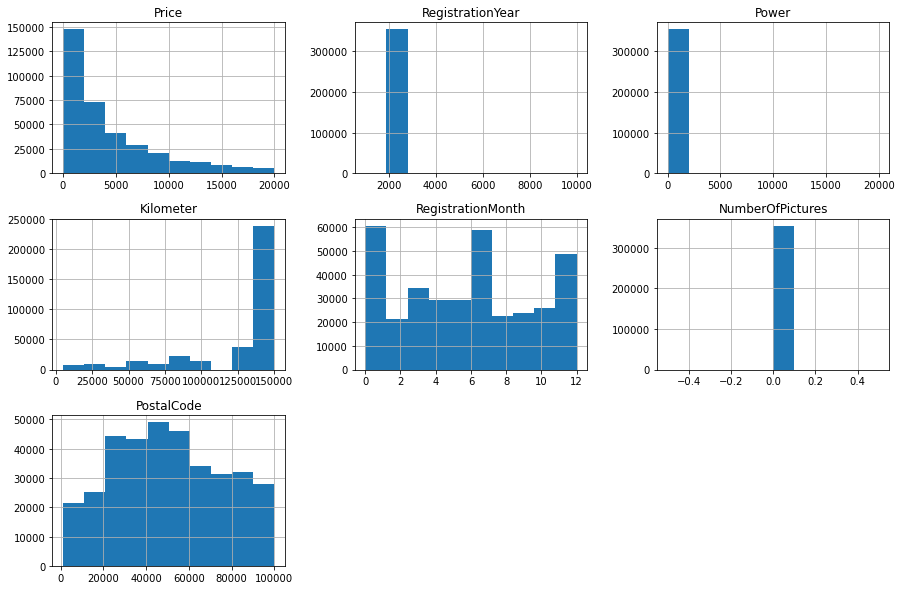

In [7]:
df.hist(figsize=(15,10));

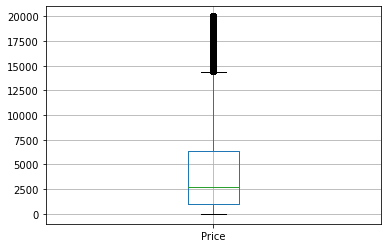

In [8]:
df.boxplot('Price');

In [9]:
#Удалим цены меньше 100 
df = df.loc[df.loc[:,'Price'] > 100]

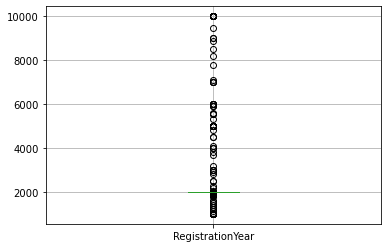

In [10]:
#Посмотрим на года регистрации и удалим аномалии 
df.boxplot('RegistrationYear');

In [12]:
df=df.query('1900< RegistrationYear< 2017')

In [13]:
df.RegistrationYear.max()

2016

In [14]:
#Удалим мощность равную 0 
df=df[df['Power'] != 0]

In [15]:
#Удалим месяца равные 0
df=df[df['RegistrationMonth'] != 0]

In [16]:
# заменим значения nan в Repaired на no,возможно пропуск означает что машина не чинилась
df['Repaired']=df['Repaired'].fillna('no')

In [17]:
df['Repaired'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df.FuelType.unique()

array(['gasoline', 'petrol', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Тут мы видим, что один из видов топлива - 'other',то есть другое.Возможно, пропуски объясняются тем, 
что люде не знают какой у них тип топлива или не нашли правильныый ответ.Думаю что можно заменить nan на other 

In [19]:
df['FuelType']=df['FuelType'].fillna('other')

In [20]:
df.FuelType.value_counts()

petrol      176229
gasoline     85096
other        11090
lpg           4414
cng            471
hybrid         201
electric        72
Name: FuelType, dtype: int64

In [22]:
df.Gearbox.unique()

array(['manual', 'auto', nan], dtype=object)

В данных мы видим только два типа коробок.Я зашел на сайт по купле-продаже авто и в фильтре "коробка" увидил 5(!) видов коробок.Из этого можно сделать вывод, что скорее всего,пользователь не нашел подходящую коробку.Думаю следует все nan обобщить к "other"

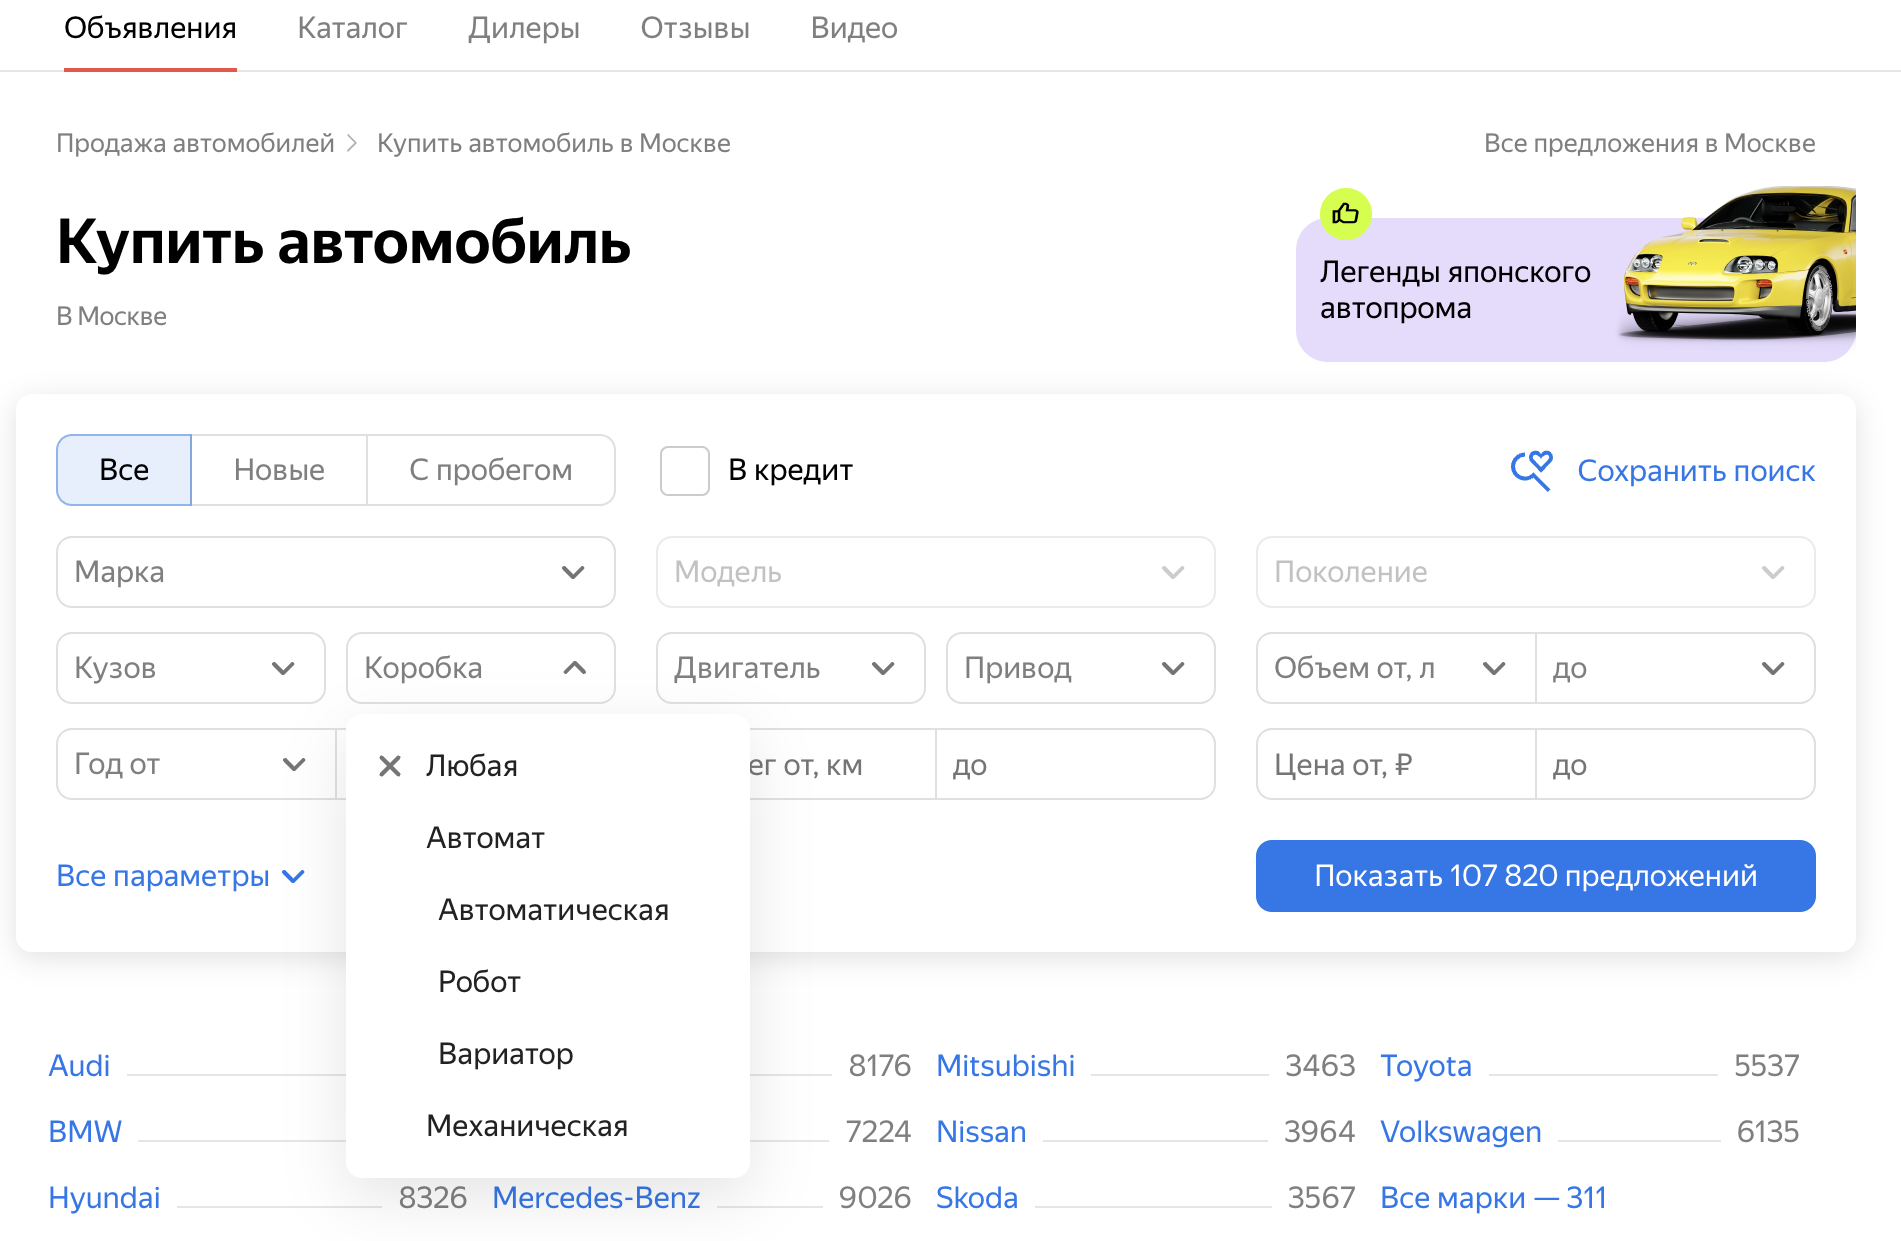

In [23]:
df['Gearbox']=df['Gearbox'].fillna('other')

In [24]:
df.isna().sum()

DateCrawled             0
Price                   0
VehicleType          7439
RegistrationYear        0
Gearbox                 0
Power                   0
Model                8937
Kilometer               0
RegistrationMonth       0
FuelType                0
Brand                   0
Repaired                0
DateCreated             0
NumberOfPictures        0
PostalCode              0
LastSeen                0
dtype: int64

В столбце Model не очень много пропусков,по этому предлогаю их удадалить.Да и как их обработать?Моделей автомобилей много, и подобрать к каждойму пропуску нужную можедь не получится.
Так же посутпим с типом кузова. 

In [25]:
df = df.dropna()

##### Так же думаю,что стоит удалить столбцы с датой и временем.
- 1)Они не понадобились для заполения других столбцов.
- 2) Для задачи предсказания цены эти данные не нужны.

In [26]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354360,2016-04-02 20:37:03,3999,wagon,2005,manual,3,3er,150000,5,gasoline,bmw,no,2016-04-02 00:00:00,0,81825,2016-04-06 20:47:12
354362,2016-03-19 19:53:49,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [27]:
df = df.drop(columns = ['DateCrawled','DateCreated','LastSeen','RegistrationMonth','PostalCode','NumberOfPictures'])

In [28]:
df

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
...,...,...,...,...,...,...,...,...,...,...
354360,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


In [29]:
df['Repaired'] = df['Repaired'].map({'yes':1, 'no':0}).astype(int)

## Обучение моделей

- разделим на выборки
- закодиркем при помощи OH
- обучим(LinearRegression,DecisionTreeRegressor,CatBoost,LightGBM)

In [31]:
target = df['Price']
features = df.drop('Price',axis=1)

In [32]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=12345)

In [33]:
features_valid,features_test,target_valid,target_test= train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

In [34]:
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(
    features, target, test_size=0.1, random_state=12345)

features_valid_1,features_test_1,target_valid_1,target_test_oe= train_test_split(
    features_test_1, target_test_1, test_size=0.5, random_state=12345)

In [35]:
features_ohe = ['Brand', 'Model', 'VehicleType', 'Gearbox', 'FuelType']


In [36]:
features_numeric_ohe = ['Power','Kilometer']

In [37]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [38]:
encoder_ohe.fit(features_train[features_ohe])
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[features_ohe])

features_train = features_train.drop(features_ohe, axis=1)

In [39]:
scaler = StandardScaler()
features_train[features_numeric_ohe] = scaler.fit_transform(features_train[features_numeric_ohe])

In [40]:
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[features_ohe])

features_test = features_test.drop(features_ohe, axis=1)


features_test[features_numeric_ohe] = scaler.transform(
    features_test[features_numeric_ohe]
)

In [41]:
features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[features_ohe])

features_valid = features_valid.drop(features_ohe, axis=1)


features_valid[features_numeric_ohe] = scaler.transform(
    features_valid[features_numeric_ohe]
)

####  LinearRegression

In [42]:
%%time
model = LinearRegression().fit(features_train,target_train)

CPU times: user 8.37 s, sys: 2.44 s, total: 10.8 s
Wall time: 3.41 s


In [43]:
Time_Train1 = '3.2 s'

In [44]:
%%time
predict = model.predict(features_valid)
RMSE1 =  mean_squared_error(target_valid, predict)**0.5
print(RMSE1)

2657.8567331093263
CPU times: user 209 ms, sys: 103 ms, total: 313 ms
Wall time: 45.9 ms


In [45]:
Time1 = '42.3 ms'

##### DecisionTreeRegressor

In [46]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1) 
encoder.fit_transform(df[features_ohe])

features_train_oe = features_train_1.copy()
features_test_oe = features_test_1.copy()
features_valid_oe = features_valid_1.copy()

features_train_oe[features_ohe] = encoder.transform(features_train_1[features_ohe])
features_test_oe[features_ohe] = encoder.transform(features_test_1[features_ohe])
features_valid_oe[features_ohe] = encoder.transform(features_valid_1[features_ohe])



In [47]:
dec_tree = DecisionTreeRegressor(random_state=12345)

In [48]:
 
parametrs = {
              'max_depth': range (1,13, 2)}
grid = GridSearchCV(dec_tree, parametrs, cv=5,scoring='neg_mean_squared_error')

In [49]:
%%time
grid.fit(features_train_oe,target_train)

CPU times: user 4.98 s, sys: 55.8 ms, total: 5.04 s
Wall time: 5.09 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 13, 2)},
             scoring='neg_mean_squared_error')

In [50]:
Time_Train2 = '4.86 s'

In [51]:
%%time 
predict = grid.predict(features_valid_oe)
RMSE2 =  mean_squared_error(target_valid, predict)**0.5
print(RMSE2)

1839.323555801009
CPU times: user 3.02 ms, sys: 873 µs, total: 3.89 ms
Wall time: 3.13 ms


In [52]:
Time2 = '3.06 ms'

#### CatBoost

In [53]:
cat = CatBoostRegressor(random_state = 12345,loss_function='RMSE',iterations=2000,verbose=100) 

In [54]:
%%time
cat.fit(features_train,target_train)

Learning rate set to 0.055254
0:	learn: 4490.8058637	total: 73.5ms	remaining: 2m 26s
100:	learn: 1856.0482083	total: 927ms	remaining: 17.4s
200:	learn: 1742.2774085	total: 1.76s	remaining: 15.7s
300:	learn: 1687.1571338	total: 2.56s	remaining: 14.4s
400:	learn: 1650.9857150	total: 3.4s	remaining: 13.6s
500:	learn: 1625.8620509	total: 4.23s	remaining: 12.7s
600:	learn: 1604.6712060	total: 5.12s	remaining: 11.9s
700:	learn: 1586.6681369	total: 5.93s	remaining: 11s
800:	learn: 1573.0051877	total: 6.75s	remaining: 10.1s
900:	learn: 1560.7361031	total: 7.55s	remaining: 9.21s
1000:	learn: 1549.9529553	total: 8.33s	remaining: 8.32s
1100:	learn: 1540.1040962	total: 9.11s	remaining: 7.44s
1200:	learn: 1531.1176295	total: 9.9s	remaining: 6.58s
1300:	learn: 1523.1205127	total: 10.7s	remaining: 5.74s
1400:	learn: 1515.9025097	total: 11.5s	remaining: 4.91s
1500:	learn: 1509.1478313	total: 12.3s	remaining: 4.08s
1600:	learn: 1503.0729585	total: 13.1s	remaining: 3.27s
1700:	learn: 1497.1797461	total:

In [55]:
Time_Train3 = '16.1 s'

In [56]:
%%time
pred_valid = cat.predict(features_valid) 
RMSE3 =  mean_squared_error(target_valid, pred_valid)**0.5
print(RMSE3)
Time3 = '20.8 ms'

1514.0835969213736
CPU times: user 59.4 ms, sys: 22.8 ms, total: 82.2 ms
Wall time: 29.4 ms


In [57]:
Time3 = '20.8 ms'

#### LightGBM

In [58]:
%%time
LGBM = LGBMRegressor(random_state = 12345,n_estimators = 2000, boosting_type = 'gbdt')
LGBM.fit(features_train,target_train)

CPU times: user 37.1 s, sys: 4.65 s, total: 41.8 s
Wall time: 6.99 s


LGBMRegressor(n_estimators=2000, random_state=12345)

In [59]:
Time_Train4 = '7.21 s'

In [60]:
%%time
pred_valid = LGBM .predict(features_valid) 
RMSE4 =  mean_squared_error(target_valid, pred_valid)**0.5
print(RMSE4)
Time4 = '316 ms'

1448.0405743320227
CPU times: user 2.25 s, sys: 126 ms, total: 2.38 s
Wall time: 347 ms


## Анализ моделей

In [61]:
data = pd.DataFrame([['LinearRegression',RMSE1,Time1,Time_Train1],
                  ['DecisionTreeRegressor',RMSE2, Time2,Time_Train2],
                  ['CatBoost',RMSE3, Time3,Time_Train3],
                  ['LightGBM',RMSE4,Time4,Time_Train4]], 
columns=['Model','RMSE','Prediction_Time','Training_Time'])
print(data)

,Model,RMSE,Prediction_Time,Training_Time
0,LinearRegression,2657.856733,42.3 ms,3.2 s
1,DecisionTreeRegressor,1839.323556,3.06 ms,4.86 s
2,CatBoost,1514.083597,20.8 ms,16.1 s
3,LightGBM,1448.040574,316 ms,7.21 s


#### Вывод

Исходя из показателей,можно сделать вывод, что лчшей моделью является LightGBM.На этой модели и протетсируем тестовую выборку.

## Тестирование лучшей модели

In [63]:
%%time
pred_test = LGBM .predict(features_test) 
RMSE_test =  mean_squared_error(target_test, pred_test)**0.5
print(RMSE_test)

1500.704590400061
CPU times: user 2.2 s, sys: 85.7 ms, total: 2.28 s
Wall time: 337 ms
